# Regression 종합실습

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 여기에 딥러닝을 위해 필요한 함수들을 불러오세요.
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from tensorflow.keras.optimizers import Adam # 옵티마이저 설정을 위해서

* 학습곡선 그래프 함수 만들기

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats.csv'
data = pd.read_csv(path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Income 	|	가구당 평균 소득액(1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Education 	|	 교육수준(범주 : 10~18)	|	feature	|
|	Urban 	|	 매장이 도심에 있는지 여부(범주 : Yes, No)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|


In [4]:
data['Sales'].mean()

7.496325

## 2.데이터 준비

### (1) 데이터 분할1 : x, y 나누기

In [5]:
target = 'Sales'
X = data.drop(target,axis=1)
y = data[target]

### (2) 변수정리

### (3) NA 조치

### (4) 가변수화

In [6]:
dumm_cols = ['ShelveLoc','Urban','US']
X = pd.get_dummies(X,columns=dumm_cols,drop_first=True)

### (5) 데이터분할2

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.3,random_state=2022)

### (6) Scaling

In [8]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
X_train = scaler.fit_transform(X_train)

# validation 셋은 적용만!
X_val = scaler.transform(X_val)

## 3.모델링

* 히든레이어를 추가한 모델 두 개 이상을 생성한 후
* 성능을 비교하시오.
* 성능을 높이기 위해서 조절할 것들
    * 히든레이어 수
    * 히든레이어 노드수
    * epochs 수
    * learning_rate : 0.1 ~ 0.0001 사이에서 조정(예 Adam(learning_rate = 0.01))


#### **레이어 개수 정하는 공식. 정답은 아님 참고만할것**
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FZMCjt%2FbtrkJ7eRYiz%2FFkP2OMPTsgtkqz1KcfO1Pk%2Fimg.png)

### (1) 모델1

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [9]:
# 분석 단위 구조 
nfeatures = X.shape[1]
nfeatures

11

In [11]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense(4, input_shape=(nfeatures,), activation='relu')
layer2 = Dense(1, )

# 모델에 추가
model.add(layer1)
model.add(layer2)

# 모델요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 48        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [12]:
# 컴파일
model.compile(optimizer=Adam(lr=0.5),loss='mse')

# 학습
epochs=100
batch_size=32
history = model.fit(X_train,
          y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_split=0.2).history 


Epoch 1/100


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 1s 32ms/step - loss: 21.6078 - val_loss: 12.8247
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 6.3663 - val_loss: 9.3619
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 4.9937 - val_loss: 6.7825
Epoch 4/100
7/7 [==============================] - 0s 9ms/step - loss: 4.4662 - val_loss: 5.7067
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 3.6394 - val_loss: 5.0968
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 3.1120 - val_loss: 4.2654
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 2.9695 - val_loss: 3.7928
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 2.6513 - val_loss: 3.4370
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 2.3458 - val_loss: 3.0892
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 2.2064 - val_loss: 2.7074
Epoch 11/100
7/7 [===================

* 학습곡선

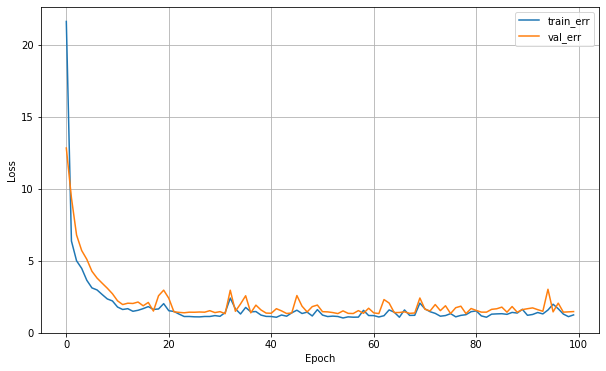

In [13]:
dl_history_plot(history)

* 검증

In [14]:
pred = model.predict(X_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'R2  : {r2_score(y_val, pred)}')

4/4 [==============================] - 0s 2ms/step
RMSE : 1.1974521039519903
MAE  : 0.9648989142576855
MAPE  : 0.34311292508420693
R2  : 0.8351737959896515


### (2) 모델2

* 모델 설계
    * 일단 먼저 손으로 구조를 그려본 후
    * 코드로 옮겨 봅시다.

In [32]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential()

# Layer 정의
layer1 = Dense(8, input_shape=(nfeatures,), activation='relu')
layer2 = Dense(4, activation='relu')
layer3 = Dense(1, )

# 모델에 추가
model.add(layer1)
model.add(layer2)
model.add(layer3)

# 모델요약
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


### **코드 간결하게 작성하기**

In [37]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
# sales는 음수값이 나올 수 없으므로 활성화함수를 relu로 사용한다고 생각해도 좋다.
# 다른 활성화함수들보다 일반적으로 성능이 좋은 함수이기도 함. 
model = Sequential([Dense(8, input_shape=(nfeatures,), activation='relu'),
                    Dense(4, activation='relu'),
                    Dense(1, )
                   ])


# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


* 컴파일 + 학습

In [33]:
# 컴파일
model.compile(optimizer=Adam(lr=0.3),loss='mse')

# 학습
epochs = 100
batch_size = 32
history2 = model.fit(X_train, y_train,
                     epochs = epochs,
                     batch_size = batch_size,
                     validation_split=0.2).history


Epoch 1/100


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 1s 37ms/step - loss: 25.8796 - val_loss: 20.5761
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 10.3911 - val_loss: 14.3654
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 8.6500 - val_loss: 12.9049
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 6.2852 - val_loss: 7.1750
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 4.6205 - val_loss: 7.3902
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 4.1463 - val_loss: 5.4712
Epoch 7/100
7/7 [==============================] - 0s 7ms/step - loss: 3.8056 - val_loss: 5.0017
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 3.5019 - val_loss: 4.7911
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 3.1895 - val_loss: 4.2706
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 3.0486 - val_loss: 4.1012
Epoch 11/100
7/7 [=================

* 학습곡선

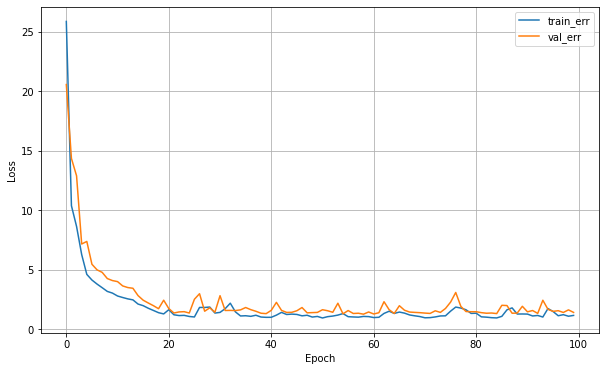

In [34]:
dl_history_plot(history2)

* 검증

In [35]:
pred = model.predict(X_val)
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')
print(f'R2  : {r2_score(y_val, pred)}')

4/4 [==============================] - 0s 2ms/step
RMSE : 1.1006900303985456
MAE  : 0.8381850488980611
MAPE  : 0.3009129065865565
R2  : 0.8607356297265075


In [ ]:
# 평균 모델의 오차를 약 77프로 잡아낸 모델이다  